#Breast Cancer Model
...


In [2]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#LOAD DATA

# Download latest version
path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")

df = pd.read_csv(f'{path}/data.csv')
df.head()
print(df.columns)
df.head()

100%|██████████| 48.6k/48.6k [00:00<00:00, 3.24MB/s]

Extracting files...
Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


##Clean Data


In [3]:
print(df.isnull().sum())

#DROP IRRELEVANT COLUMNS
df = df.drop('Unnamed: 32', axis=1)
df = df.drop('id', axis=1)
df = df.drop_duplicates()


id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [4]:
#REPLACE CATEGORICAL VALUES TO NUMERICAL
df['diagnosis'] = df['diagnosis'].replace(to_replace='M', value = 1)
df['diagnosis'] = df['diagnosis'].replace(to_replace='B', value = 0)
print(df['diagnosis'][16:22])

16    1
17    1
18    1
19    0
20    0
21    0
Name: diagnosis, dtype: int64


<ipython-input-4-10e9a7b5d9e4>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['diagnosis'] = df['diagnosis'].replace(to_replace='B', value = 0)


##Balance Data

diagnosis
0    0.627417
1    0.372583
Name: count, dtype: float64


<Axes: xlabel='diagnosis', ylabel='count'>

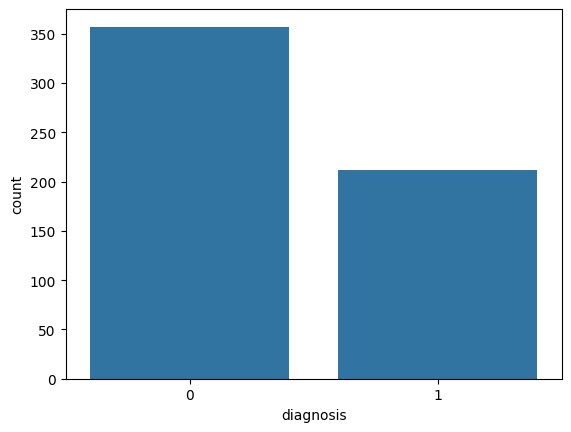

In [5]:
#LOOK DATA DISTRIBUTION

print(df['diagnosis'].value_counts() / len(df)) #Distribution

sns.countplot(x='diagnosis', data=df)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


<Axes: xlabel='diagnosis', ylabel='count'>

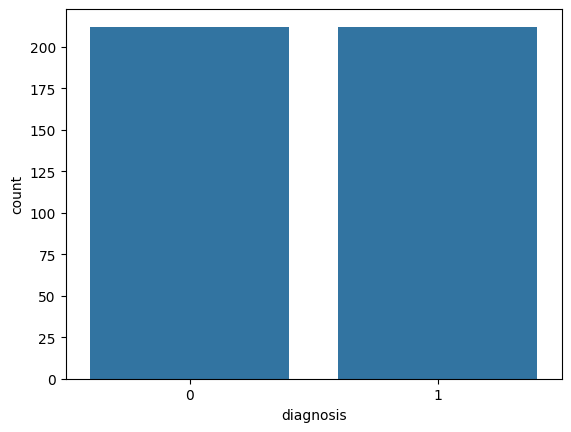

In [6]:
#BALANCE DATA
from imblearn.under_sampling import RandomUnderSampler

X = df.drop('diagnosis', axis=1)
Y = df['diagnosis']

under_sampler = RandomUnderSampler(random_state=42)
x_over, y_over = under_sampler.fit_resample(X, Y)

#RESAMPLE VISUALIZATION
sns.countplot(x=y_over, data=x_over)

In [ ]:
x_over.head()

##DATA ANALYSIS


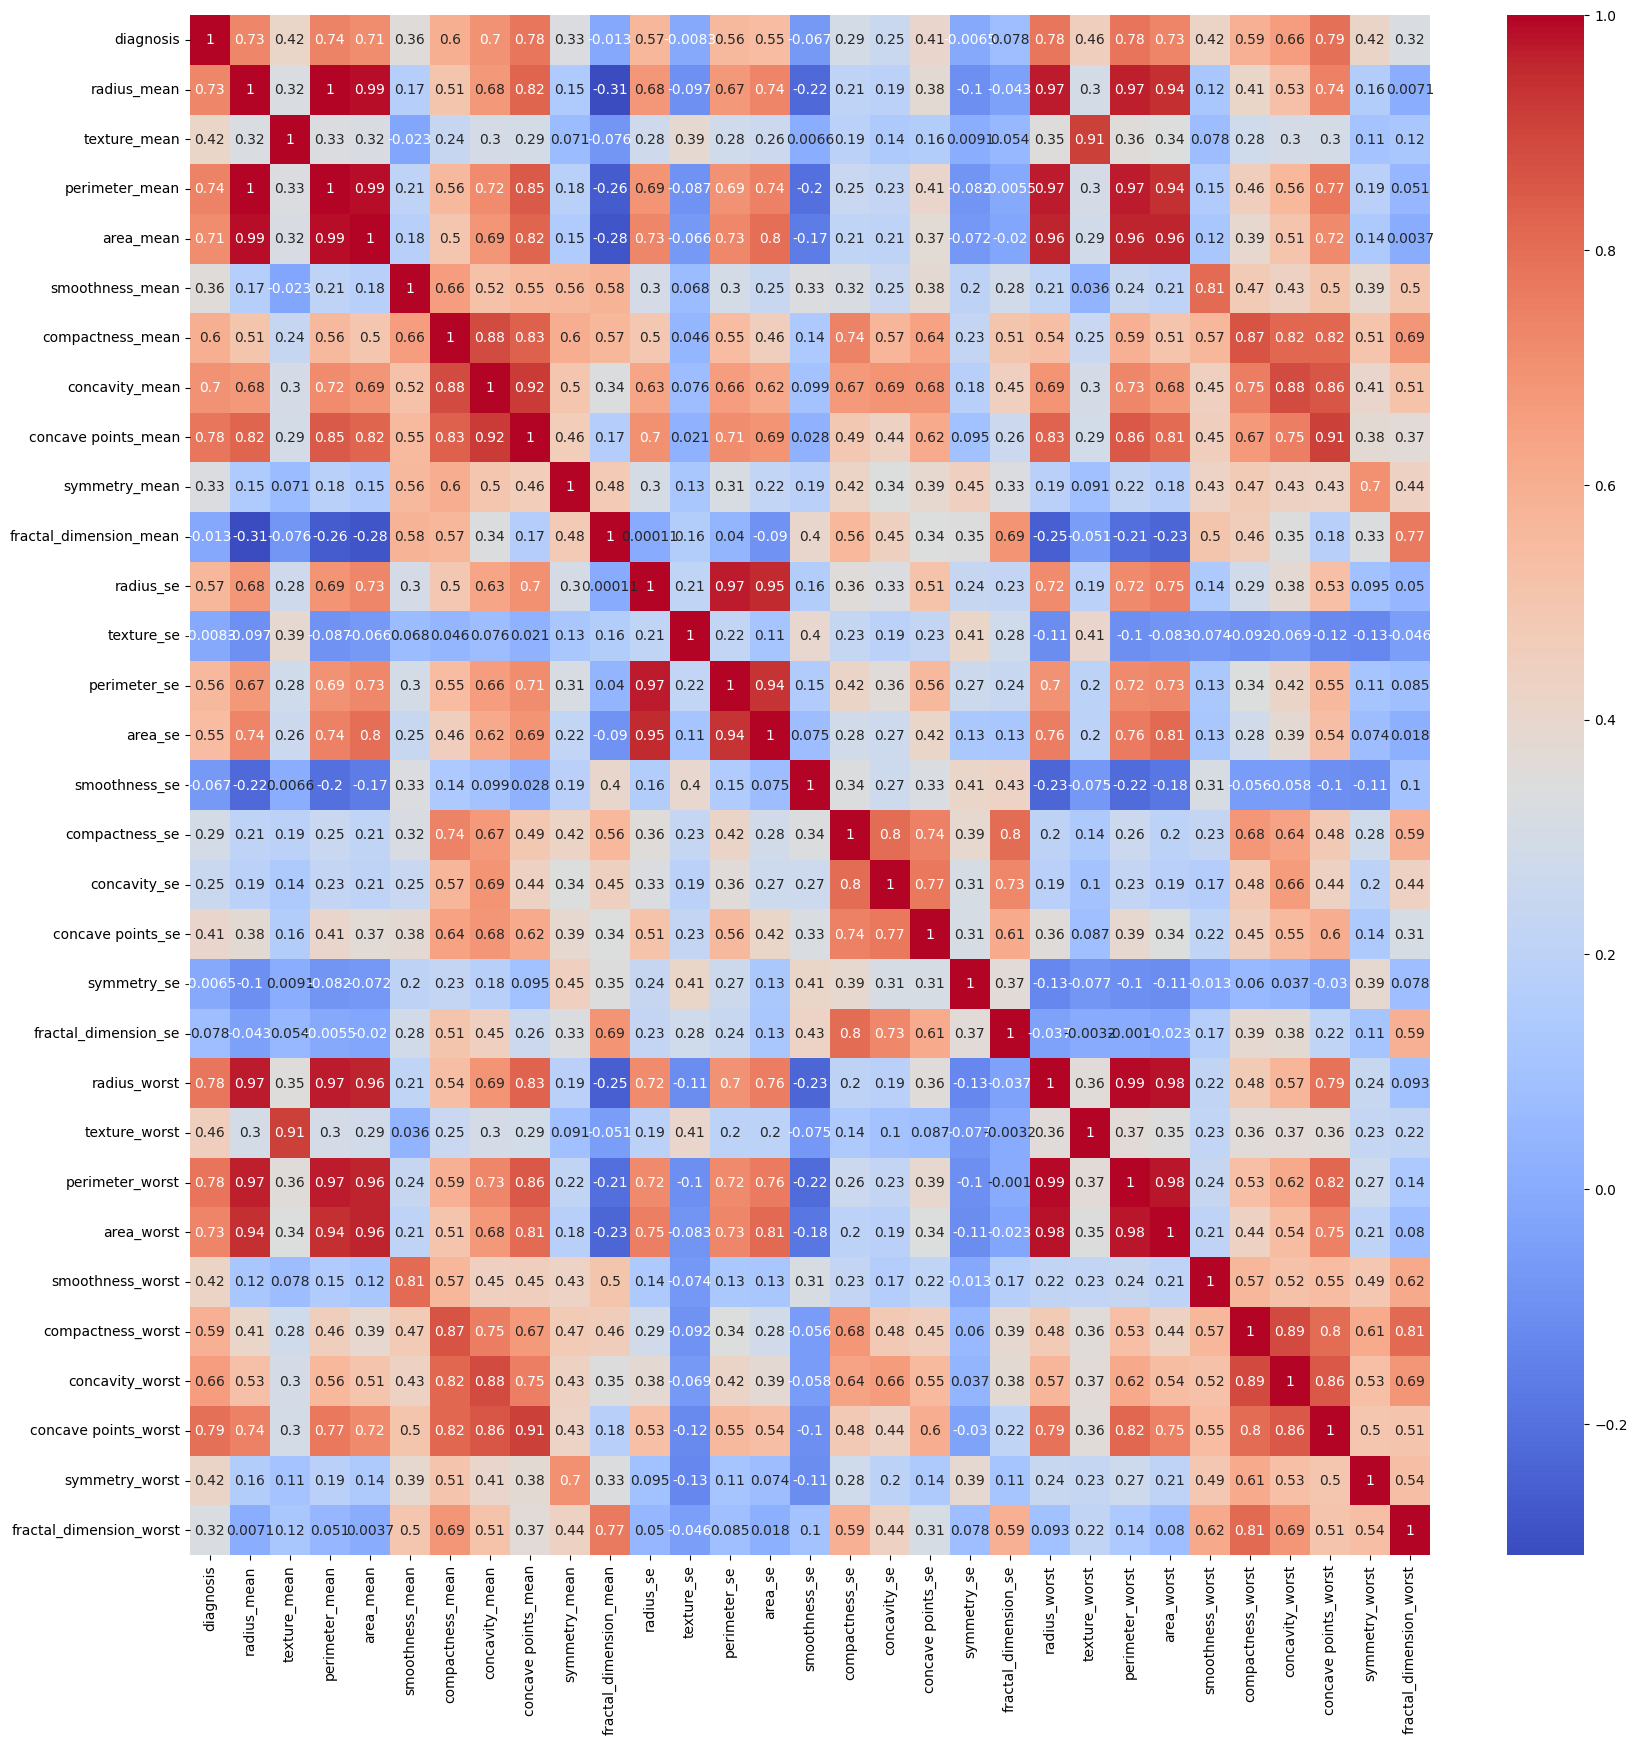

In [7]:
corr = df.corr()

fig = plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

smoothness_se             -0.067016
fractal_dimension_mean    -0.012838
texture_se                -0.008303
symmetry_se               -0.006522
fractal_dimension_se       0.077972
concavity_se               0.253730
compactness_se             0.292999
fractal_dimension_worst    0.323872
symmetry_mean              0.330499
smoothness_mean            0.358560
concave points_se          0.408042
texture_mean               0.415185
symmetry_worst             0.416294
smoothness_worst           0.421465
texture_worst              0.456903
area_se                    0.548236
perimeter_se               0.556141
radius_se                  0.567134
compactness_worst          0.590998
compactness_mean           0.596534
concavity_worst            0.659610
concavity_mean             0.696360
area_mean                  0.708984
radius_mean                0.730029
area_worst                 0.733825
perimeter_mean             0.742636
radius_worst               0.776454
concave points_mean        0

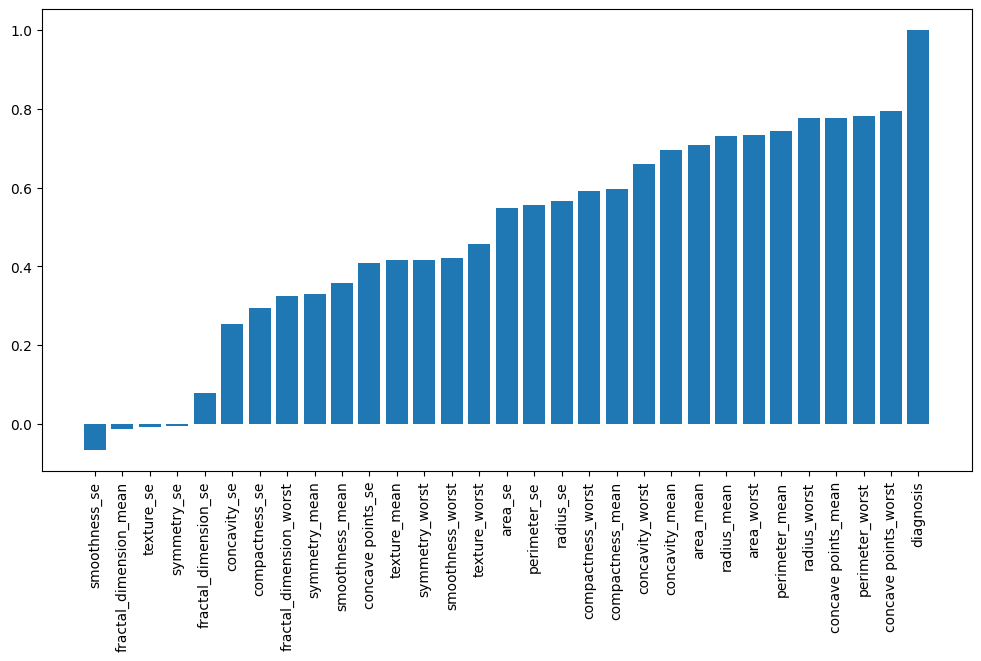

In [8]:
diagnosis_corr = corr['diagnosis'].sort_values(ascending=True)

print(diagnosis_corr)

#Visualizae
figure = plt.figure(figsize=(12, 6))
plt.bar(diagnosis_corr.index, diagnosis_corr.values)
plt.xticks(rotation=90)
plt.show()

In [9]:
x_over = x_over.drop(labels=['smoothness_se', 'texture_se', 'fractal_dimension_mean'], axis=1)
x_over.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
395,14.060,17.18,89.75,609.1,0.08045,0.05361,0.026810,0.03251,0.1641,0.1504,...,14.92,25.34,96.42,684.5,0.10660,0.12310,0.08460,0.07911,0.2523,0.06609
110,9.777,16.99,62.50,290.2,0.10370,0.08404,0.043340,0.01778,0.1584,0.4030,...,11.05,21.47,71.68,367.0,0.14670,0.17650,0.13000,0.05334,0.2533,0.08468
481,13.900,19.24,88.73,602.9,0.07991,0.05326,0.029950,0.02070,0.1579,0.3316,...,16.41,26.42,104.40,830.5,0.10640,0.14150,0.16730,0.08150,0.2356,0.07603
493,12.460,12.83,78.83,477.3,0.07372,0.04043,0.007173,0.01149,0.1613,0.3276,...,13.19,16.36,83.24,534.0,0.09439,0.06477,0.01674,0.02680,0.2280,0.07028
136,11.710,16.67,74.72,423.6,0.10510,0.06095,0.035920,0.02600,0.1339,0.4489,...,13.33,25.48,86.16,546.7,0.12710,0.10280,0.10460,0.06968,0.1712,0.07343


In [ ]:
sns.pairplot(df, hue='diagnosis')
plt.show()

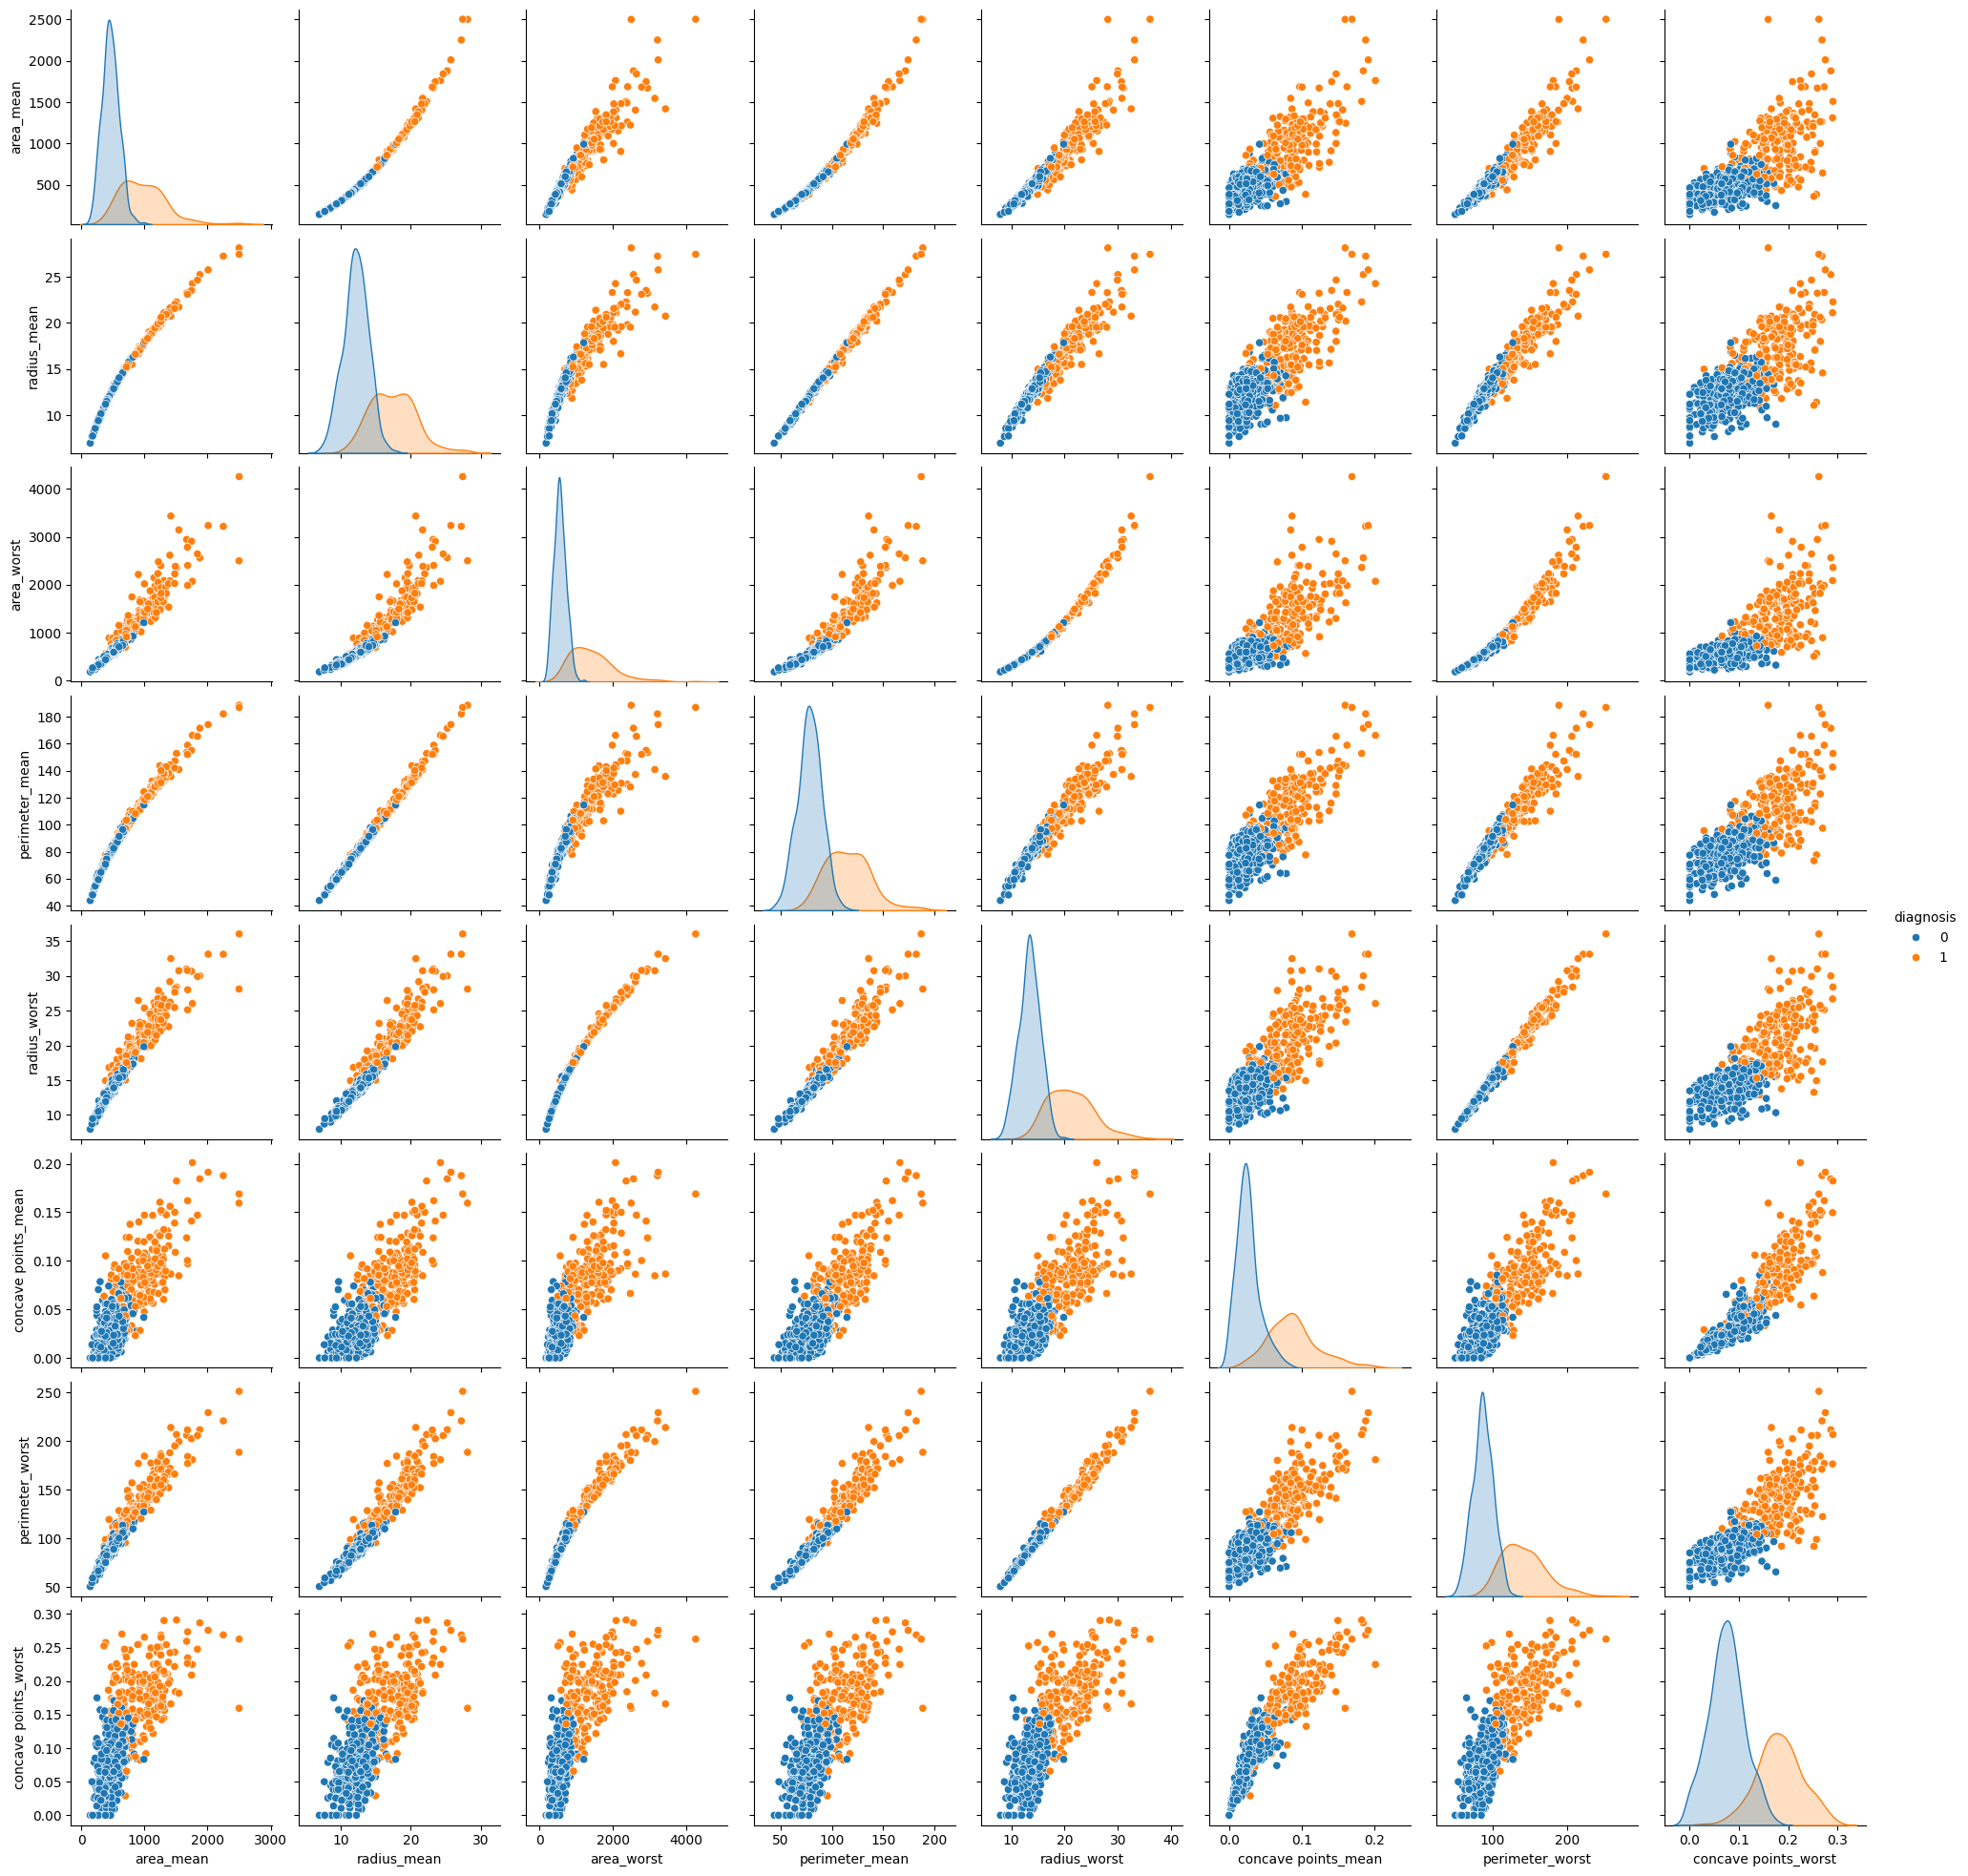

In [11]:
#MORE RELEVANT FEATURES

relevant_features = ['area_mean', 'radius_mean', 'area_worst', 'perimeter_mean', 'radius_worst', 'concave points_mean', 'perimeter_worst', 'concave points_worst', 'diagnosis']
df_relevant_features = df[relevant_features]
sns.pairplot(df_relevant_features, hue='diagnosis')
plt.show()

As we can see in the correlation graphs, there is a positive correlation between the variables, and in the most of the case the correlation es strong. As too we can see so clear the separation between classes.

##SPLIT AND SCALE DATA

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Split Data
X_train, X_test, Y_train, Y_test = train_test_split(x_over, y_over, random_state=42, test_size=0.2)

#Scale Data
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)


## TRAIN MODEL

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

#Train Model
model = LogisticRegression(random_state=42)
model.fit(X_train_scale, Y_train)
y_predict = model.predict(X_test_scale)

print(accuracy_score(Y_test, y_predict))

0.9764705882352941


##Model Evaluation

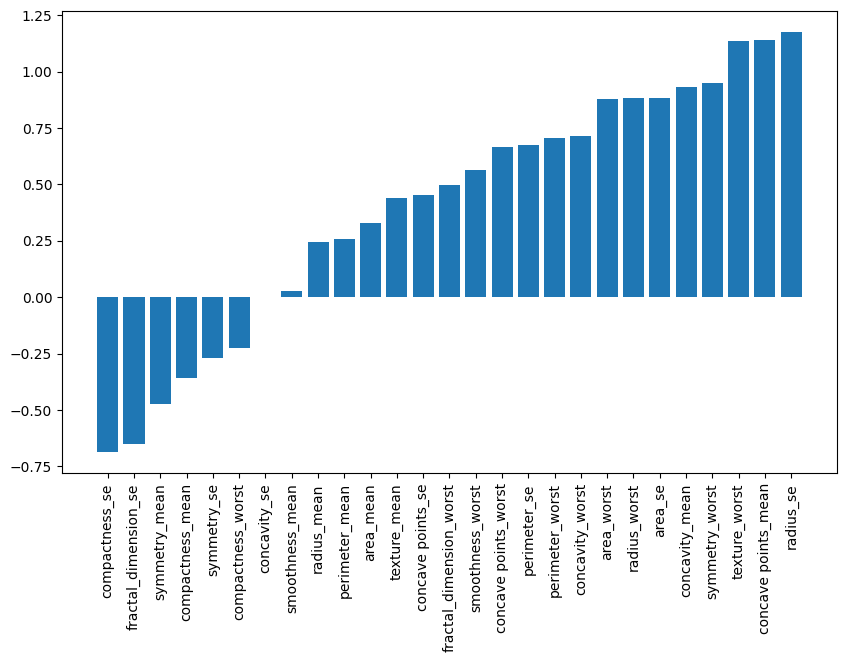

In [14]:
#Coeficcient Weights

weights = pd.Series(model.coef_[0], index=x_over.columns).sort_values(ascending=True)

plt.figure(figsize=(10, 6))
plt.bar(weights.index, weights.values)
plt.xticks(rotation=90)
plt.show()

Precision Benign: 0.9565217391304348
Precision Malignant: 1.0


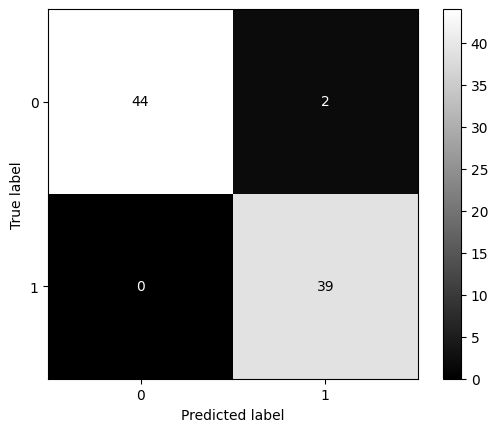

In [15]:
#Confusion Matrix

cm = confusion_matrix(Y_test, y_predict)

#Precion
precision_benign = cm[0, 0] / (cm[0, 0] + cm[0, 1])
precision_malignant = cm[1, 1] / (cm[1, 0] + cm[1, 1])

print(f'Precision Benign: {precision_benign}')
print(f'Precision Malignant: {precision_malignant}')

#Display Matrix Confusion
disp = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
disp.plot(cmap='gray')

In the results, we can see that the Logistic Regression model achieves 97% accuracy, demonstrating excellent performance. Additionally, the precision is 95% for classifying Benign cases and 100% for classifying Malignant cases.

To be honest, that 100% precision raises some concerns for me because someone once said that achieving 100% might indicate something is wrong.


*   **Accuracy: 97%**
*   **Benign Precision: 95%**
*   **Malignant Precision: 100%**

